# How to Evaluate a classifier using sikit learn

In [41]:
import numpy as np
import pandas as pd

In [42]:
dataframe=pd.read_csv('diabetes.csv')

In [43]:
feature_cols=['Pregnancies','Glucose','BMI','Age']
X=dataframe[feature_cols]
y=dataframe.Outcome

In [44]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
LG=LogisticRegression()
LG.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
y_pred_LG=LG.predict(X_test)

In [63]:
from sklearn import metrics

In [64]:
performance=metrics.accuracy_score(y_test,y_pred_LG)
print(performance)

0.786458333333


#  Null Accuracy: accuracy that could be achived predicting the most frequent class

In [65]:
# examine the class distribution of the testing set(using pands series method)
print(y_test.value_counts())

0    130
1     62
Name: Outcome, dtype: int64


In [66]:
# calculating the percentage of 1
print(y_test.mean())

0.3229166666666667


In [67]:
# calculating the percentage of zero
print(1-y_test.mean())

0.6770833333333333


In [68]:
# calculating the null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(),1-y_test.mean())

0.6770833333333333

In [69]:
# calculating the null accuracy for multiclass classification problem
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: Outcome, dtype: float64

# comparing the True and predict Respons value

In [70]:
print(y_test.values[0:25])
print(y_pred_LG[0:25])

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [71]:
metrics.confusion_matrix(y_test,y_pred_LG)

array([[118,  12],
       [ 29,  33]], dtype=int64)

In [72]:
print("True: ",y_test.values[0:25])
print("pred: ",y_pred_LG[0:25])

True:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
pred:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [73]:
# save confusion matrix and slice into four pices
confusion=metrics.confusion_matrix(y_test,y_pred_LG)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [74]:
print("Accuracy Matrix: ",metrics.accuracy_score(y_test,y_pred_LG))
print("From ConfusionM: ",(TP+TN)/(TP+TN+FP+FN))

Accuracy Matrix:  0.786458333333
From ConfusionM:  0.786458333333


# Classification Error:
### Also known as "miss classification rate"

In [75]:
print("From ConfusionM: ",(FP+FN)/(TP+TN+FP+FN))
print("From Function  : ",1-metrics.accuracy_score(y_test,y_pred_LG))

From ConfusionM:  0.213541666667
From Function  :  0.213541666667


In [76]:
TP

33

In [77]:
TP.type()

AttributeError: 'numpy.int64' object has no attribute 'type'

In [78]:
type(TP)

numpy.int64

In [79]:
type(confusion[1,1])

numpy.int64

In [80]:
print("{}",metrics.confusion_matrix(y_test,y_pred_LG))

{} [[118  12]
 [ 29  33]]


# Adjusting the classification threshold

In [91]:
# print the first 10 predicted respons
LG.predict(X_test)[0:11]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [89]:
# simple slicing
from numpy import array
# define array
data = array([11, 22, 33, 44, 55])
print(data[-4:-2])

[22 33]


In [94]:
# array shape
from numpy import array
# define array
data = array([11, 22, 33, 44, 55])
print(data.shape[0])

5


In [95]:
# print the frist 11 predicted probabilities of class membership
LG.predict_proba(X_test)[:11,:]

array([[ 0.18927557,  0.81072443],
       [ 0.75921928,  0.24078072],
       [ 0.84727986,  0.15272014],
       [ 0.41763013,  0.58236987],
       [ 0.83001749,  0.16998251],
       [ 0.89942995,  0.10057005],
       [ 0.36048212,  0.63951788],
       [ 0.30970217,  0.69029783],
       [ 0.71913515,  0.28086485],
       [ 0.62248167,  0.37751833],
       [ 0.47485818,  0.52514182]])

In [96]:
# print the first 11 predicted probabilities for 1
LG.predict_proba(X_test)[:11,1]

array([ 0.81072443,  0.24078072,  0.15272014,  0.58236987,  0.16998251,
        0.10057005,  0.63951788,  0.69029783,  0.28086485,  0.37751833,
        0.52514182])

In [97]:
y_pred_prob=LG.predict_proba(X_test)[:,1]

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

In [99]:
plt.rcParams['font.size']=14

Text(0,0.5,'Frequency')

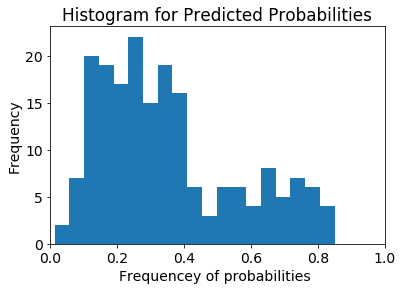

In [102]:
# histogram for predicted probabilities
plt.hist(y_pred_prob,bins=19)
plt.xlim(0,1)
plt.title("Histogram for Predicted Probabilities")
plt.xlabel("Frequencey of probabilities ")
plt.ylabel("Frequency")

In [103]:
# predict diabetes if predicted probabilities  is > 0.3
from sklearn.preprocessing import binarize


In [105]:
y_predict_class=binarize([y_pred_prob],0.3)[0]

In [106]:
# now print the first 10 predicted probabilities
y_pred_prob[0:10]

array([ 0.81072443,  0.24078072,  0.15272014,  0.58236987,  0.16998251,
        0.10057005,  0.63951788,  0.69029783,  0.28086485,  0.37751833])

In [107]:
# print the first 10 predicted class with lower threshold
y_predict_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [109]:
# previous confusion Matrix (default threshold value=0.5)
print (confusion)

[[118  12]
 [ 29  33]]


In [110]:
# New confusion Matrix ( threshold value=0.3 )
metrics.confusion_matrix(y_test,y_predict_class)

array([[89, 41],
       [ 9, 53]], dtype=int64)

In [114]:
# for previous confusion matrix Sensitivity is
print(TP/(TP+FN))

0.532258064516


In [113]:
print(33/(33+29))

0.532258064516129


In [115]:
# for previous confusion matrix Speciphicity is 
print(TN/(TN+FP))

0.907692307692


In [116]:
# for NOw
print(89/(89+41))

0.6846153846153846


# ROC curve and the Area Under the Curve (AUC)

## Question: Wouldn't it be nice, if we could see how sensitivity and specificity affected by various threshold, without changing the actual threshold

## Answer: Plot the ROC curve

Text(0,0.5,'True positive Rate Senssitivity')

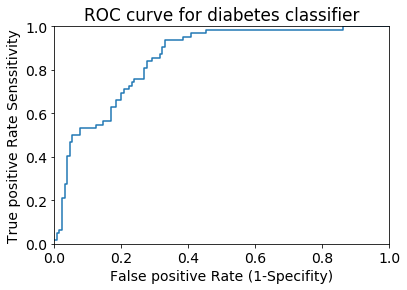

In [117]:
# most important is first argument is true value and second argumant should be predicted probability
fpr,tpr,threshold_value=metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for diabetes classifier")
plt.xlabel("False positive Rate (1-Specifity)")
plt.ylabel("True positive Rate Senssitivity")

In [122]:
# define a function that accept a threshold value and print the sensitivity and speciffity
def evaluate_threshold(threshold):
    print("Sensitivity",tpr[threshold_value>threshold][-1])
    print("Specificity",1-fpr[threshold_value>threshold][-1])

In [123]:
evaluate_threshold(0.5)

Sensitivity 0.532258064516
Specificity 0.923076923077


In [124]:
evaluate_threshold(0.3)

Sensitivity 0.854838709677
Specificity 0.684615384615
